## Removing Isolates

Since every loose node will be unmatched, so if we adjust the $n_D$ value by the number of loose nodes, we have a better idea of the controllability of the graph's clusters. Testing this below:

In [1]:
%matplotlib inline
import numpy as np 
import networkx as nx
from network_generation import generation as ng
import experiment as ex
import matplotlib.pyplot as plt
import pickle

In [2]:
def find_ER_nD(kappa, plot=False):
        
    # make sure this is a float!
    z0 = float(kappa/2)
    w1irange = np.arange(0,1,.01)
    w1o = lambda x: np.exp(-z0*np.exp(-z0*x))
    w1i = lambda y: -(1/z0)*np.log((1/z0)*np.log(1/y))

    if plot:
        plt.figure()
        plt.plot(w1irange,[w1o(i) for i in w1irange])
        plt.plot(w1irange,w1irange,'k-')
        
        w1o = lambda x: np.exp(-z0*np.exp(-z0*x))
    w1i = lambda y: -(1/z0)*np.log((1/z0)*np.log(1/y))
    
    # BABY NEWTON METHOD 
    xold = 0.5
    yold = 0.5
    check = 100
    while abs(check)>0.001:

        # move up
        ynew = w1o(xold)
        # move right 
        xnew = ynew
        
        if plot: 
            plt.plot((xold,xold),(yold,ynew),'r-')
            plt.plot((xold,xnew),(ynew,ynew),'r-')

        # compute check 
        check = xold - xnew 

        # update for next iteration
        xold = xnew 
        yold = ynew

    w1 = xnew 
    w2 = 1 - np.exp(-z0*w1)
    nD = w1 - w2 + z0*w1*(1-w2)

    return nD

ER sim with isolates done
ER sim without isolates done
ER theory done


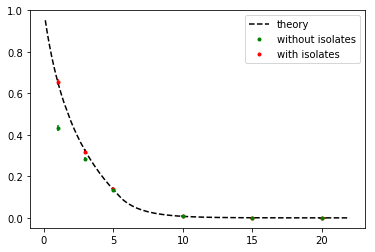

In [13]:
plt.figure()

kappa_range = [1,3,5,10,15,20]
n = 1000

ERE = ex.ERExperiment(kappa_range, n, find_scaling=False)
p1 = plt.errorbar(ERE.mean_degree_list,ERE.mean_nD_list,fmt='ro',markersize=3,ecolor='r',xerr=ERE.std_degree_list,yerr=ERE.std_nD_list)

print 'ER sim with isolates done'    

ERE = ex.ERExperiment(kappa_range, n, find_scaling=False, remove_isolates=True)
p2 = plt.errorbar(ERE.mean_degree_list,ERE.mean_nD_list,fmt='go',markersize=3,ecolor='g',xerr=ERE.std_degree_list,yerr=ERE.std_nD_list)

print 'ER sim without isolates done'    
    
# plot theory 
kappa_ranget = np.arange(.1,22,.01)
nD_list = []
for kappa in kappa_ranget:
    nD_list.append(find_ER_nD(kappa))
p3 = plt.plot(kappa_ranget,nD_list,'k--')    

print 'ER theory done'

plt.legend([p3[0],p2[0],p1[0]],['theory','without isolates','with isolates'])

ER sim without isolates done
ER theory done
2th dimension done
3th dimension done
6th dimension done
9th dimension done


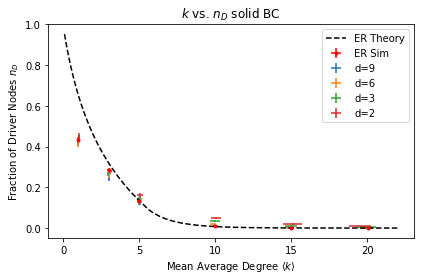

In [6]:
plt.figure()

# load and plot ER data 
kappa_range = [1,3,5,10,15,20]
n = 1000

ERE = ex.ERExperiment(kappa_range, n, find_scaling=False, remove_isolates=True)
p1 = plt.errorbar(ERE.mean_degree_list,ERE.mean_nD_list,fmt='ro',markersize=3,ecolor='r',xerr=ERE.std_degree_list,yerr=ERE.std_nD_list)

print 'ER sim without isolates done'    
    
# plot theory 
kappa_ranget = np.arange(.1,22,.01)
nD_list = []
for kappa in kappa_ranget:
    nD_list.append(find_ER_nD(kappa))
p2 = plt.plot(kappa_ranget,nD_list,'k--')    

print 'ER theory done'

## SOLID 
d_range = [2,3,6,9]
for d in d_range:
    RGGE = ex.RGGExperiment(kappa_range, n, d, shortcut_prob=0, boundary='s',find_scaling=False,remove_isolates=True)
    plt.errorbar(RGGE.mean_degree_list, RGGE.mean_nD_list, fmt='none', yerr=RGGE.std_nD_list, xerr=RGGE.std_degree_list)
    print str(d) +'th dimension done'
    
plt.title('$k$ vs. $n_D$ solid BC')
plt.xlabel('Mean Average Degree $\\langle{k}\\rangle$')
plt.ylabel('Fraction of Driver Nodes $n_D$')
legend_string = ['d='+str(d) for d in d_range]
legend_string.append('ER Sim')
legend_string.append('ER Theory')
legend_string.reverse()
plt.legend(legend_string)
plt.tight_layout()
plt.savefig('./plots/k_nD_no_isolates_s_N' + str(n) + '.eps',dpi=800)

ER sim without isolates done
ER theory done
2th dimension done
3th dimension done
6th dimension done
9th dimension done


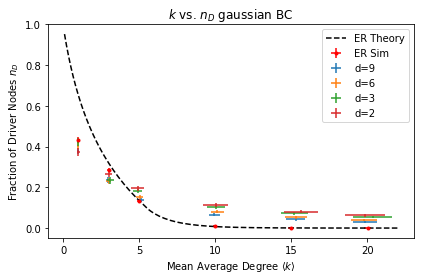

In [7]:
plt.figure()

# load and plot ER data 
kappa_range = [1,3,5,10,15,20]
n = 1000

ERE = ex.ERExperiment(kappa_range, n, find_scaling=False, remove_isolates=True)
p1 = plt.errorbar(ERE.mean_degree_list,ERE.mean_nD_list,fmt='ro',markersize=3,ecolor='r',xerr=ERE.std_degree_list,yerr=ERE.std_nD_list)

print 'ER sim without isolates done'    
    
# plot theory 
kappa_ranget = np.arange(.1,22,.01)
nD_list = []
for kappa in kappa_ranget:
    nD_list.append(find_ER_nD(kappa))
p2 = plt.plot(kappa_ranget,nD_list,'k--')    

print 'ER theory done'

## GAUSSIAN 
d_range = [2,3,6,9]
for d in d_range:
    RGGE = ex.RGGExperiment(kappa_range, n, d, shortcut_prob=0, boundary='g',find_scaling=False,remove_isolates=True)
    plt.errorbar(RGGE.mean_degree_list, RGGE.mean_nD_list, fmt='none', yerr=RGGE.std_nD_list, xerr=RGGE.std_degree_list)
    print str(d) +'th dimension done'
    
plt.title('$k$ vs. $n_D$ gaussian BC')
plt.xlabel('Mean Average Degree $\\langle{k}\\rangle$')
plt.ylabel('Fraction of Driver Nodes $n_D$')
legend_string = ['d='+str(d) for d in d_range]
legend_string.append('ER Sim')
legend_string.append('ER Theory')
legend_string.reverse()
plt.legend(legend_string)
plt.tight_layout()
plt.savefig('./plots/k_nD_no_isolates_g_N' + str(n) + '.eps',dpi=800)

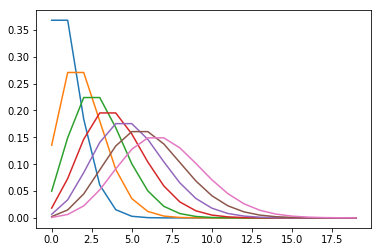

In [12]:
x = np.arange(0,20,1)
for b in range(1,8,1):
    plt.plot(x,[np.exp(-b)*(b**xx)/np.math.factorial(xx) for xx in x])